In [1]:
import pandas as pd
import re

In [2]:
import matplotlib.pyplot as plt

In [3]:
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In [5]:
pd.set_option('display.max_rows',60000)

In [6]:
pd.set_option('display.max_colwidth', 20)

In [7]:
df = pd.read_csv('Film_Permits.csv')

In [8]:
df.head()

,EventID,EventType,StartDateTime,EndDateTime,EnteredOn,EventAgency,ParkingHeld,Borough,CommunityBoard(s),PolicePrecinct(s),Category,SubCategoryName,Country,ZipCode(s)
0,300134,Shooting Permit,07/18/2016 06:00...,07/18/2016 12:00...,07/13/2016 10:28...,Mayor's Office o...,COLUMBUS AVENUE ...,Manhattan,7,20,Television,Morning Show,United States of...,10023
1,299797,Shooting Permit,07/18/2016 07:00...,07/18/2016 07:00...,07/11/2016 06:49...,Mayor's Office o...,22 STREET betwee...,Queens,2,108,Television,Cable-episodic,United States of...,11101
2,300179,Shooting Permit,07/18/2016 07:00...,07/18/2016 10:00...,07/13/2016 12:11...,Mayor's Office o...,MONITOR STREET b...,Queens,"1, 2","108, 94",Television,Episodic series,United States of...,"11101, 11222, 11378"
3,300630,Shooting Permit,07/18/2016 12:00...,07/18/2016 09:00...,07/14/2016 10:13...,Mayor's Office o...,ROCKAWAY BEACH B...,Queens,14,100,Commercial,Commercial,United States of...,11692
4,300127,Shooting Permit,07/18/2016 06:00...,07/18/2016 11:59...,07/13/2016 10:04...,Mayor's Office o...,10 AVENUE betwee...,Manhattan,4,10,Television,Reality,United States of...,10001


In [9]:
df.shape

(50847, 14)

In [10]:
df.dtypes

EventID               int64
EventType            object
StartDateTime        object
EndDateTime          object
EnteredOn            object
EventAgency          object
ParkingHeld          object
Borough              object
CommunityBoard(s)    object
PolicePrecinct(s)    object
Category             object
SubCategoryName      object
Country              object
ZipCode(s)           object
dtype: object

In [11]:
df['year'] = df['StartDateTime'].str.extract(r"(\d\d\d\d)")
#df['year']

In [12]:
df['month'] = df['StartDateTime'].str.extract(r"(\d\d)/")
#df['month']

In [13]:
#Let's drop 2018
df2 = df[df.year != '2018']
df2.head(2)

,EventID,EventType,StartDateTime,EndDateTime,EnteredOn,EventAgency,ParkingHeld,Borough,CommunityBoard(s),PolicePrecinct(s),Category,SubCategoryName,Country,ZipCode(s),year,month
0,300134,Shooting Permit,07/18/2016 06:00...,07/18/2016 12:00...,07/13/2016 10:28...,Mayor's Office o...,COLUMBUS AVENUE ...,Manhattan,7,20,Television,Morning Show,United States of...,10023,2016,07
1,299797,Shooting Permit,07/18/2016 07:00...,07/18/2016 07:00...,07/11/2016 06:49...,Mayor's Office o...,22 STREET betwee...,Queens,2,108,Television,Cable-episodic,United States of...,11101,2016,07


### Time section

In [14]:
df2['start_time'] = pd.to_datetime(df2['StartDateTime'], format='%m/%d/%Y %H:%M:%S %p')
df2.head(1)

C:\Users\kellykiki\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,EventID,EventType,StartDateTime,EndDateTime,EnteredOn,EventAgency,ParkingHeld,Borough,CommunityBoard(s),PolicePrecinct(s),Category,SubCategoryName,Country,ZipCode(s),year,month,start_time
0,300134,Shooting Permit,07/18/2016 06:00...,07/18/2016 12:00...,07/13/2016 10:28...,Mayor's Office o...,COLUMBUS AVENUE ...,Manhattan,7,20,Television,Morning Show,United States of...,10023,2016,07,2016-07-18 06:00:00


In [15]:
df2['end_time'] = pd.to_datetime(df2['EndDateTime'])
df2.head(1)

C:\Users\kellykiki\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,EventID,EventType,StartDateTime,EndDateTime,EnteredOn,EventAgency,ParkingHeld,Borough,CommunityBoard(s),PolicePrecinct(s),Category,SubCategoryName,Country,ZipCode(s),year,month,start_time,end_time
0,300134,Shooting Permit,07/18/2016 06:00...,07/18/2016 12:00...,07/13/2016 10:28...,Mayor's Office o...,COLUMBUS AVENUE ...,Manhattan,7,20,Television,Morning Show,United States of...,10023,2016,07,2016-07-18 06:00:00,2016-07-18 12:00:00


In [17]:
#df2.end_time - df2.start_time

### What kind of things are filmed?

In [19]:
df2.EventType.value_counts()

Shooting Permit                  42387
Theater Load in and Load Outs     4096
Rigging Permit                    1159
DCAS Prep/Shoot/Wrap Permit        598
Name: EventType, dtype: int64

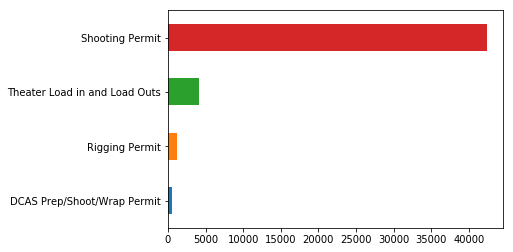

In [20]:
df2.EventType.value_counts().sort_values(ascending=True).plot(kind='barh')

In [21]:
df2.Category.value_counts()

Television             25850
Film                    8474
Theater                 4468
Commercial              4113
Still Photography       3049
WEB                     1627
Student                  317
Documentary              190
Music Video              151
Red Carpet/Premiere        1
Name: Category, dtype: int64

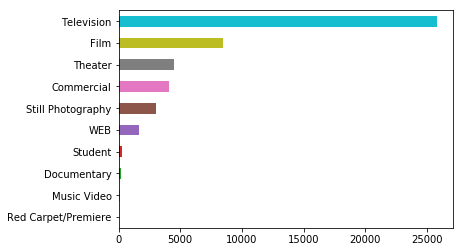

In [22]:
df2.Category.value_counts().sort_values(ascending=True).plot(kind='barh')

#### Who do you mean by "television"?

In [161]:
tv = df2[df2['Category'].str.contains('Television',case=False,na=False)]
tv.head(2)

,EventID,EventType,StartDateTime,EndDateTime,EnteredOn,EventAgency,ParkingHeld,Borough,CommunityBoard(s),PolicePrecinct(s),Category,SubCategoryName,Country,ZipCode(s),year,month,start_time,end_time,street
0,300134,Shooting Permit,07/18/2016 06:00...,07/18/2016 12:00...,07/13/2016 10:28...,Mayor's Office o...,COLUMBUS AVENUE ...,Manhattan,7,20,Television,Morning Show,United States of...,10023,2016,07,2016-07-18 06:00:00,2016-07-18 12:00:00,COLUMBUS AVENUE
1,299797,Shooting Permit,07/18/2016 07:00...,07/18/2016 07:00...,07/11/2016 06:49...,Mayor's Office o...,22 STREET betwee...,Queens,2,108,Television,Cable-episodic,United States of...,11101,2016,07,2016-07-18 07:00:00,2016-07-18 19:00:00,22 STREET betwee...


In [162]:
tv.SubCategoryName.value_counts()

Episodic series            14510
Cable-episodic              5098
Pilot                       1287
News                        1079
Cable-other                  596
Reality                      562
Not Applicable               523
Morning Show                 509
Made for TV/mini-series      419
Special/Awards Show          307
Variety                      276
Talk Show                    273
Cable-daily                  198
Game show                     90
Children                      47
Syndication/First Run         44
Daytime soap                  20
Magazine Show                 12
Name: SubCategoryName, dtype: int64

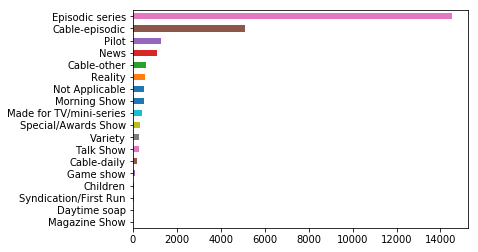

In [163]:
tv.SubCategoryName.value_counts(ascending=True).plot(kind='barh')

### Total sample again: Per year & per month

In [164]:
df2.year.value_counts()

2015    8958
2017    8222
2016    8094
2013    8094
2014    7962
2012    6910
Name: year, dtype: int64

In [165]:
df2.month.value_counts().sort_index(ascending=True)

01    2808
02    3153
03    3935
04    3680
05    3677
06    3790
07    4246
08    4552
09    4510
10    5516
11    4768
12    3605
Name: month, dtype: int64

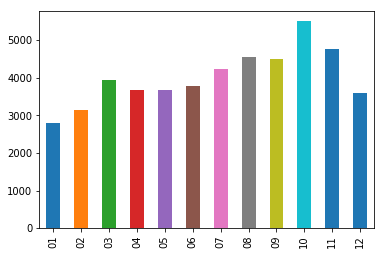

In [34]:
df2.month.value_counts().sort_index(ascending=True).plot(kind='bar')

### Famous locations

In [37]:
### REGEX!!!!!!!!! 
df2['street'] = df2['ParkingHeld'].str.extract(r"(.*) between")
df2['street'].head()

C:\Users\kellykiki\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0        COLUMBUS AVENUE
1    22 STREET betwee...
2    MONITOR STREET b...
3    ROCKAWAY BEACH B...
4    10 AVENUE betwee...
Name: street, dtype: object

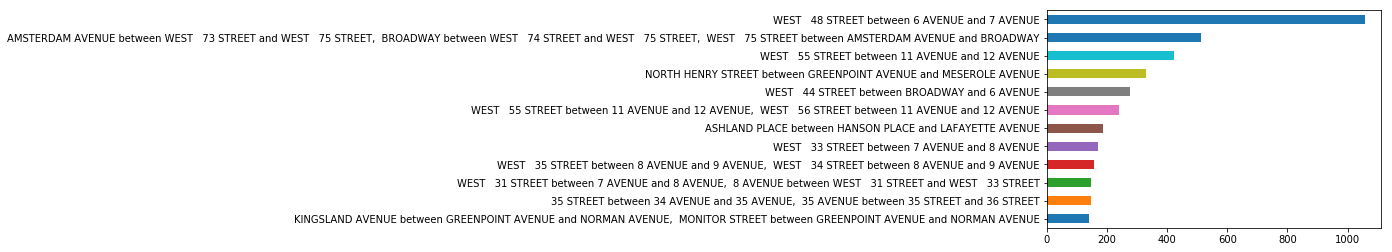

In [38]:
streets = df2.ParkingHeld.value_counts()
#150 shoots or more
streets.head(12).sort_values(ascending=True).plot(kind='barh')

### Countries of production

In [39]:
df2.Country.value_counts()

United States of America    48184
United Kingdom                 16
Canada                          9
Japan                           8
Panama                          7
France                          6
Australia                       4
Netherlands                     3
Ireland                         2
Germany                         1
Name: Country, dtype: int64

In [51]:
#Let's exclude the US
other_countries = df2[df2.Country != 'United States of America']
other_countries.head(2)

,EventID,EventType,StartDateTime,EndDateTime,EnteredOn,EventAgency,ParkingHeld,Borough,CommunityBoard(s),PolicePrecinct(s),Category,SubCategoryName,Country,ZipCode(s),year,month,start_time,end_time,street
3902,323135,Shooting Permit,12/11/2016 06:30...,12/11/2016 09:00...,12/07/2016 02:54...,Mayor's Office o...,PARK AVENUE betw...,Manhattan,"1, 2, 5, 6, 8","108, 114, 17, 18...",Television,Episodic series,Canada,"10022, 10152, 11...",2016,12,2016-12-11 06:30:00,2016-12-11 21:00:00,PARK AVENUE betw...
3981,323680,Shooting Permit,12/14/2016 07:00...,12/14/2016 12:00...,12/12/2016 09:35...,Mayor's Office o...,WASHINGTON PLACE...,Manhattan,2,6,Commercial,Commercial,Canada,"10011, 10014",2016,12,2016-12-14 07:00:00,2016-12-14 12:00:00,WASHINGTON PLACE


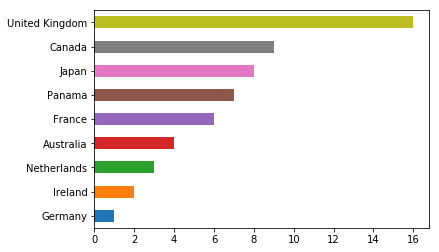

In [52]:
other_countries.Country.value_counts().sort_values(ascending=True).plot(kind='barh')

In [66]:
other = other_countries.groupby('Country').Category.value_counts().unstack().fillna(0).reset_index()
other.head(1)

Category,Country,Commercial,Documentary,Film,Still Photography,Student,Television,WEB
0,Australia,0.0,0.0,0.0,0.0,0.0,4.0,0.0


In [67]:
other['total'] = other.sum(axis=1)
other.head(1)

Category,Country,Commercial,Documentary,Film,Still Photography,Student,Television,WEB,total
0,Australia,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0


In [68]:
other = other.sort_values(by='total')
other.head(2)

Category,Country,Commercial,Documentary,Film,Still Photography,Student,Television,WEB,total
3,Germany,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,Ireland,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0


In [69]:
other.drop(columns='total',inplace=True)
other.head(2)

Category,Country,Commercial,Documentary,Film,Still Photography,Student,Television,WEB
3,Germany,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,Ireland,0.0,0.0,2.0,0.0,0.0,0.0,0.0


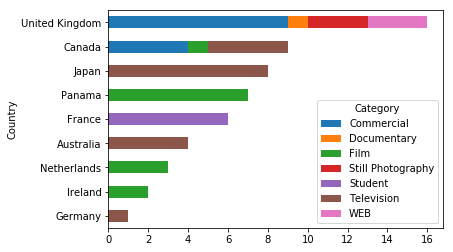

In [71]:
other.plot(kind='barh',stacked=True,x='Country')

### Back to the total sample: Areas

In [84]:
areas = df2.Borough.value_counts()
areas

Manhattan        24223
Brooklyn         14615
Queens            7510
Bronx             1292
Staten Island      600
Name: Borough, dtype: int64

In [85]:
areas_pct = df2.Borough.value_counts(normalize=True)*100
areas_pct

Manhattan        50.213516
Brooklyn         30.296434
Queens           15.567993
Bronx             2.678275
Staten Island     1.243781
Name: Borough, dtype: float64

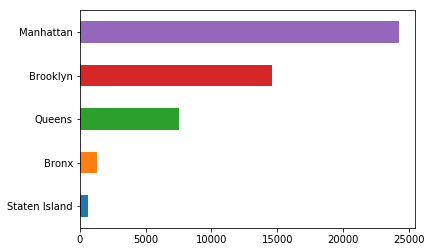

In [86]:
areas.sort_values(ascending=True).plot(kind='barh')

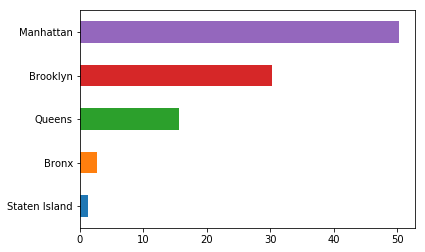

In [87]:
areas_pct.sort_values(ascending=True).plot(kind='barh')

In [97]:
hoods = df2.groupby('Borough').Category.value_counts().unstack().fillna(0).reset_index()
hoods.head(1)

Category,Borough,Commercial,Documentary,Film,Music Video,Red Carpet/Premiere,Still Photography,Student,Television,Theater,WEB
0,Bronx,116.0,9.0,333.0,4.0,0.0,46.0,11.0,746.0,8.0,19.0


In [98]:
hoods['total'] = hoods.sum(axis=1)
hoods = hoods.sort_values(by='total',ascending=True)
hoods.head()

Category,Borough,Commercial,Documentary,Film,Music Video,Red Carpet/Premiere,Still Photography,Student,Television,Theater,WEB,total
4,Staten Island,31.0,0.0,184.0,1.0,0.0,2.0,7.0,372.0,1.0,2.0,600.0
0,Bronx,116.0,9.0,333.0,4.0,0.0,46.0,11.0,746.0,8.0,19.0,1292.0
3,Queens,259.0,9.0,1036.0,13.0,0.0,113.0,26.0,5840.0,9.0,205.0,7510.0
1,Brooklyn,1181.0,43.0,3019.0,58.0,0.0,901.0,102.0,8127.0,634.0,550.0,14615.0
2,Manhattan,2526.0,129.0,3902.0,75.0,1.0,1987.0,171.0,10765.0,3816.0,851.0,24223.0


In [99]:
hoods.drop(columns='total',inplace=True)
hoods.head(2)

Category,Borough,Commercial,Documentary,Film,Music Video,Red Carpet/Premiere,Still Photography,Student,Television,Theater,WEB
4,Staten Island,31.0,0.0,184.0,1.0,0.0,2.0,7.0,372.0,1.0,2.0
0,Bronx,116.0,9.0,333.0,4.0,0.0,46.0,11.0,746.0,8.0,19.0


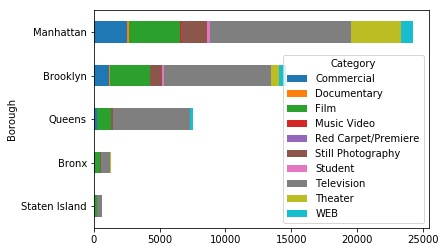

In [100]:
hoods.plot(kind='barh',stacked=True,x='Borough')

### But now I am curious: 
### a) What are the most famous streets for cine productions? (Or at least the most... filmed streets)

In [101]:
films = df2[df2.Category.str.contains("Film", case=False, na=False)]
films.head(3)

,EventID,EventType,StartDateTime,EndDateTime,EnteredOn,EventAgency,ParkingHeld,Borough,CommunityBoard(s),PolicePrecinct(s),Category,SubCategoryName,Country,ZipCode(s),year,month,start_time,end_time,street
10,297653,Shooting Permit,07/18/2016 06:30...,07/18/2016 05:00...,06/29/2016 09:32...,Mayor's Office o...,GRAND STREET bet...,Brooklyn,1,90,Film,Short,United States of...,11211,2016,07,2016-07-18 06:30:00,2016-07-18 17:00:00,GRAND STREET
11,300432,Shooting Permit,07/17/2016 04:00...,07/18/2016 07:00...,07/14/2016 11:18...,Mayor's Office o...,BLAKE AVENUE bet...,Brooklyn,16,73,Film,Feature,United States of...,11212,2016,07,2016-07-17 04:00:00,2016-07-18 07:00:00,BLAKE AVENUE
16,299892,Shooting Permit,07/18/2016 06:00...,07/18/2016 10:00...,07/12/2016 10:49...,Mayor's Office o...,EXCHANGE PLACE b...,Manhattan,1,1,Film,Feature,United States of...,"10004, 10005",2016,07,2016-07-18 06:00:00,2016-07-18 22:00:00,EXCHANGE PLACE b...


In [103]:
### REGEX!!!!!!!!! 
films['street'] = films['ParkingHeld'].str.extract(r"(.*) between")
films.head()

C:\Users\kellykiki\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,EventID,EventType,StartDateTime,EndDateTime,EnteredOn,EventAgency,ParkingHeld,Borough,CommunityBoard(s),PolicePrecinct(s),Category,SubCategoryName,Country,ZipCode(s),year,month,start_time,end_time,street
10,297653,Shooting Permit,07/18/2016 06:30...,07/18/2016 05:00...,06/29/2016 09:32...,Mayor's Office o...,GRAND STREET bet...,Brooklyn,1,90,Film,Short,United States of...,11211,2016,07,2016-07-18 06:30:00,2016-07-18 17:00:00,GRAND STREET
11,300432,Shooting Permit,07/17/2016 04:00...,07/18/2016 07:00...,07/14/2016 11:18...,Mayor's Office o...,BLAKE AVENUE bet...,Brooklyn,16,73,Film,Feature,United States of...,11212,2016,07,2016-07-17 04:00:00,2016-07-18 07:00:00,BLAKE AVENUE
16,299892,Shooting Permit,07/18/2016 06:00...,07/18/2016 10:00...,07/12/2016 10:49...,Mayor's Office o...,EXCHANGE PLACE b...,Manhattan,1,1,Film,Feature,United States of...,"10004, 10005",2016,07,2016-07-18 06:00:00,2016-07-18 22:00:00,EXCHANGE PLACE b...
17,300423,Shooting Permit,07/18/2016 07:00...,07/18/2016 09:00...,07/14/2016 10:58...,Mayor's Office o...,34 AVENUE betwee...,Queens,1,114,Film,Feature,United States of...,11106,2016,07,2016-07-18 07:00:00,2016-07-18 21:00:00,34 AVENUE betwee...
28,300200,Shooting Permit,07/18/2016 06:00...,07/18/2016 10:00...,07/13/2016 01:11...,Mayor's Office o...,ST LUKES PLACE b...,Manhattan,2,6,Film,Feature,United States of...,10014,2016,07,2016-07-18 06:00:00,2016-07-18 22:00:00,ST LUKES PLACE b...


In [106]:
#cinestreets = films.street.value_counts()

In [142]:
films.street.value_counts().reset_index().sort_values(by='street',ascending=True)

,index,street
2820,POWERS STREET be...,1
3765,WEST 127 STREET...,1
3764,PINE STREET betw...,1
3763,WEST 121 STREET,1
3762,WASHINGTON STREE...,1
3761,WEST STREET betw...,1
3760,WEST 187 STREET...,1
3759,POWERS STREET be...,1
3758,SURF AVENUE betw...,1
3766,EAST 16 STREET...,1


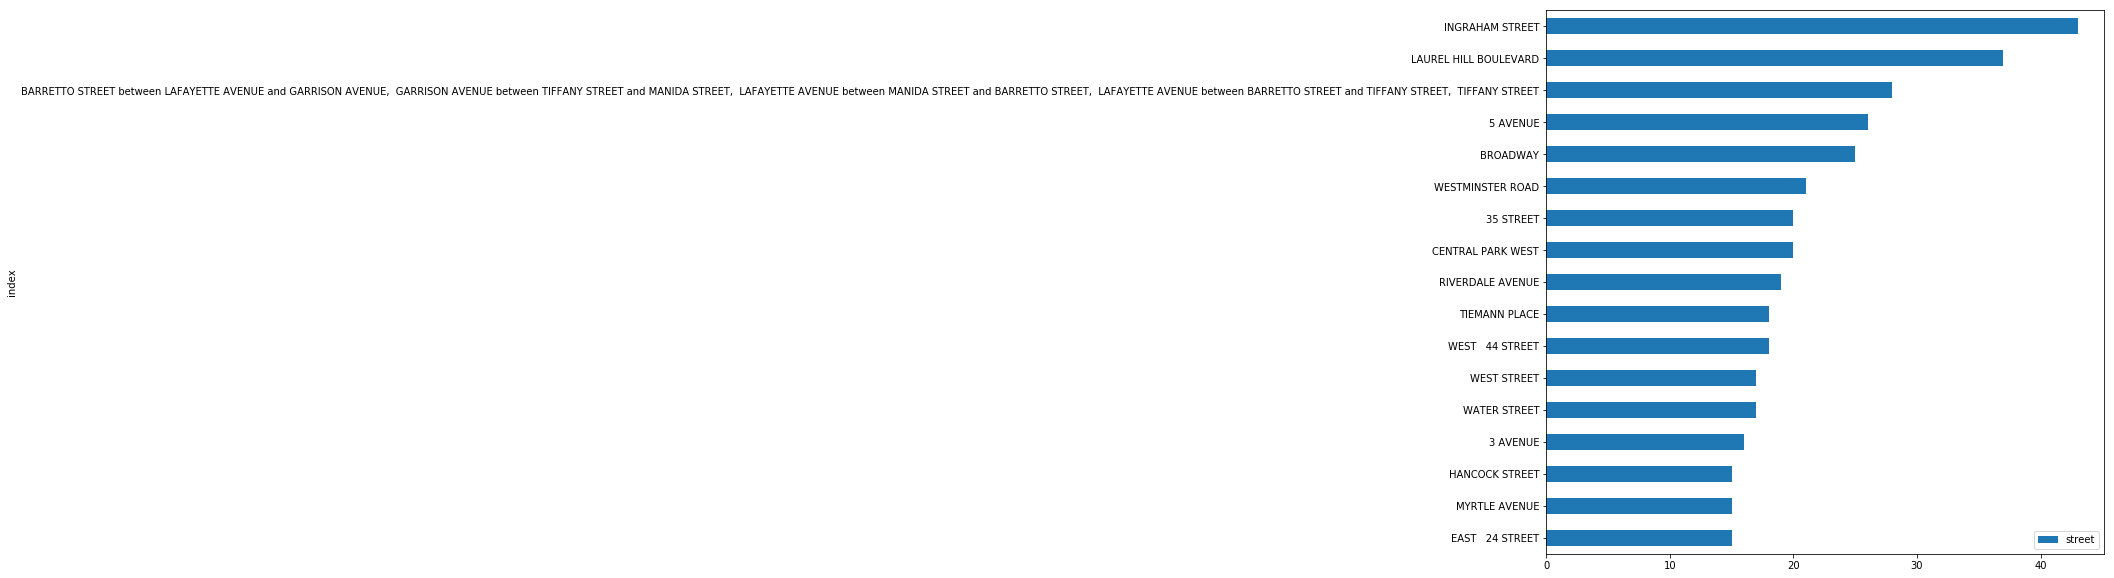

In [147]:
films.street.value_counts().reset_index().sort_values(by='street',ascending=True).tail(17).plot(kind='barh',x='index',figsize=(10,10))

In [107]:
Manhattan_films = films[films.Borough.str.contains("Manhattan",case=False,na=False)]
Manhattan_films.head(3)

,EventID,EventType,StartDateTime,EndDateTime,EnteredOn,EventAgency,ParkingHeld,Borough,CommunityBoard(s),PolicePrecinct(s),Category,SubCategoryName,Country,ZipCode(s),year,month,start_time,end_time,street
16,299892,Shooting Permit,07/18/2016 06:00...,07/18/2016 10:00...,07/12/2016 10:49...,Mayor's Office o...,EXCHANGE PLACE b...,Manhattan,1,1,Film,Feature,United States of...,"10004, 10005",2016,07,2016-07-18 06:00:00,2016-07-18 22:00:00,EXCHANGE PLACE b...
28,300200,Shooting Permit,07/18/2016 06:00...,07/18/2016 10:00...,07/13/2016 01:11...,Mayor's Office o...,ST LUKES PLACE b...,Manhattan,2,6,Film,Feature,United States of...,10014,2016,07,2016-07-18 06:00:00,2016-07-18 22:00:00,ST LUKES PLACE b...
51,300304,Shooting Permit,07/19/2016 06:00...,07/19/2016 09:00...,07/13/2016 04:17...,Mayor's Office o...,WARREN STREET be...,Manhattan,1,1,Film,Feature,United States of...,10007,2016,07,2016-07-19 06:00:00,2016-07-19 21:00:00,WARREN STREET be...


In [119]:
Manhattan_films.street.value_counts().head(16)

BROADWAY                                                             23
CENTRAL PARK WEST                                                    20
WEST   44 STREET                                                     18
TIEMANN PLACE                                                        18
EAST   24 STREET                                                     15
VANDAM STREET                                                        15
5 AVENUE                                                             13
RIVERSIDE DRIVE                                                      13
BEAVER STREET                                                        13
WEST   44 STREET between 7 AVENUE and 6 AVENUE,  WEST   44 STREET    12
WEST   46 STREET                                                     12
WEST   27 STREET                                                     10
WEST   16 STREET                                                     10
WEST   56 STREET                                                

In [135]:
Manhattan_films.street.value_counts().reset_index().sort_values(by='street',ascending=True)

,index,street
1397,WEST 39 STREET...,1
1858,LEXINGTON AVENUE...,1
1859,WEST 17 STREET...,1
1860,SPRING STREET be...,1
1861,WALKER STREET be...,1
1862,WHITE STREET bet...,1
1863,WAVERLY PLACE be...,1
1864,PARK AVENUE betw...,1
1865,BLEEKER STREET b...,1
1866,WEST 187 ST betw...,1


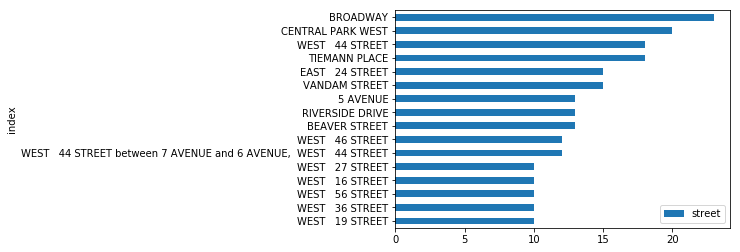

In [137]:
Manhattan_films.street.value_counts().reset_index().sort_values(by='street',ascending=True).tail(16).plot(kind='barh',x='index')

In [138]:
Brooklyn_films = films[films.Borough.str.contains("Brooklyn",case=False,na=False)]
Brooklyn_films.head(3)

,EventID,EventType,StartDateTime,EndDateTime,EnteredOn,EventAgency,ParkingHeld,Borough,CommunityBoard(s),PolicePrecinct(s),Category,SubCategoryName,Country,ZipCode(s),year,month,start_time,end_time,street
10,297653,Shooting Permit,07/18/2016 06:30...,07/18/2016 05:00...,06/29/2016 09:32...,Mayor's Office o...,GRAND STREET bet...,Brooklyn,1,90,Film,Short,United States of...,11211,2016,07,2016-07-18 06:30:00,2016-07-18 17:00:00,GRAND STREET
11,300432,Shooting Permit,07/17/2016 04:00...,07/18/2016 07:00...,07/14/2016 11:18...,Mayor's Office o...,BLAKE AVENUE bet...,Brooklyn,16,73,Film,Feature,United States of...,11212,2016,07,2016-07-17 04:00:00,2016-07-18 07:00:00,BLAKE AVENUE
67,300634,Shooting Permit,07/20/2016 06:00...,07/20/2016 10:00...,07/14/2016 11:30...,Mayor's Office o...,BLAKE AVENUE bet...,Brooklyn,16,73,Film,Feature,United States of...,11212,2016,07,2016-07-20 06:00:00,2016-07-20 22:00:00,BLAKE AVENUE


In [139]:
Brooklyn_films.street.value_counts().reset_index().sort_values(by='street',ascending=True)

,index,street
941,ADAMS ST between...,1
1262,EAST 22 STREET...,1
1261,LINCOLN ROAD bet...,1
1260,DIVISION AVENUE ...,1
1259,MONTAGUE TERRACE...,1
1258,CADMAN PLAZA WES...,1
1257,LOVE LANE betwee...,1
1256,DUPONT STREET be...,1
1255,WAVERLY AVENUE b...,1
1254,WILLOW STREET be...,1


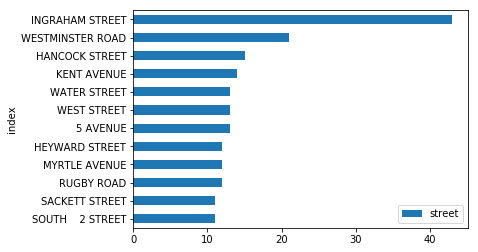

In [140]:
Brooklyn_films.street.value_counts().reset_index().sort_values(by='street',ascending=True).tail(12).plot(kind='barh',x='index')

In [149]:
Queens_films = films[films.Borough.str.contains("Queens",case=False,na=False)]
Queens_films.head(3)

,EventID,EventType,StartDateTime,EndDateTime,EnteredOn,EventAgency,ParkingHeld,Borough,CommunityBoard(s),PolicePrecinct(s),Category,SubCategoryName,Country,ZipCode(s),year,month,start_time,end_time,street
17,300423,Shooting Permit,07/18/2016 07:00...,07/18/2016 09:00...,07/14/2016 10:58...,Mayor's Office o...,34 AVENUE betwee...,Queens,1,114,Film,Feature,United States of...,11106,2016,07,2016-07-18 07:00:00,2016-07-18 21:00:00,34 AVENUE betwee...
54,300715,Shooting Permit,07/19/2016 07:00...,07/19/2016 09:00...,07/15/2016 12:17...,Mayor's Office o...,VERNON BOULEVARD...,Queens,1,114,Film,Feature,United States of...,11101,2016,07,2016-07-19 07:00:00,2016-07-19 21:00:00,VERNON BOULEVARD
97,301237,Shooting Permit,07/21/2016 08:00...,07/21/2016 09:00...,07/19/2016 09:06...,Mayor's Office o...,VERNON BOULEVARD...,Queens,1,114,Film,Feature,United States of...,11101,2016,07,2016-07-21 08:00:00,2016-07-21 21:00:00,VERNON BOULEVARD


In [150]:
Queens_films.street.value_counts().reset_index().sort_values(by='street',ascending=True)

,index,street
346,BEACH 121 STREE...,1
458,LAUREL HILL BOUL...,1
459,60th Street,1
460,76 STREET,1
461,117 STREET betwe...,1
462,2 STREET,1
463,31 AVENUE betwee...,1
464,FOREST ROAD,1
465,215 PLACE betwee...,1
466,ELIOT AVENUE bet...,1


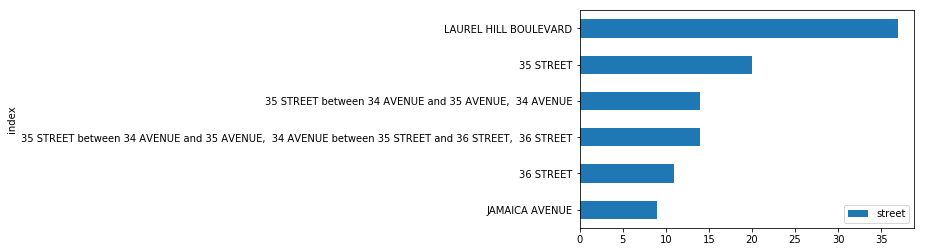

In [151]:
Queens_films.street.value_counts().reset_index().sort_values(by='street',ascending=True).tail(6).plot(kind='barh',x='index')

### b) Where current affairs happened? (Television>News)

In [195]:
news = tv[tv.SubCategoryName.str.contains("News",case=False,na=False)]
news.head(3)

,EventID,EventType,StartDateTime,EndDateTime,EnteredOn,EventAgency,ParkingHeld,Borough,CommunityBoard(s),PolicePrecinct(s),Category,SubCategoryName,Country,ZipCode(s),year,month,start_time,end_time,street
175,302031,Shooting Permit,07/23/2016 04:00...,07/23/2016 11:00...,07/22/2016 11:51...,Mayor's Office o...,WEST 48 STREET...,Manhattan,5,18,Television,News,United States of...,10036,2016,07,2016-07-23 04:00:00,2016-07-23 11:00:00,WEST 48 STREET
335,298540,Shooting Permit,07/29/2016 09:00...,07/29/2016 07:00...,07/05/2016 11:03...,Mayor's Office o...,WEST 48 STREET...,Manhattan,5,18,Television,News,United States of...,10036,2016,07,2016-07-29 09:00:00,2016-07-29 19:00:00,WEST 48 STREET
347,303350,Shooting Permit,07/30/2016 04:00...,07/30/2016 11:00...,07/29/2016 02:55...,Mayor's Office o...,WEST 48 STREET...,Manhattan,5,18,Television,News,United States of...,10036,2016,07,2016-07-30 04:00:00,2016-07-30 11:00:00,WEST 48 STREET


In [220]:
### REGEX!!!!!!!!! 
news['street'] = news['ParkingHeld'].str.extract(r"(.*) between")
news.head()

C:\Users\kellykiki\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,EventID,EventType,StartDateTime,EndDateTime,EnteredOn,EventAgency,ParkingHeld,Borough,CommunityBoard(s),PolicePrecinct(s),Category,SubCategoryName,Country,ZipCode(s),year,month,start_time,end_time,street
175,302031,Shooting Permit,07/23/2016 04:00...,07/23/2016 11:00...,07/22/2016 11:51...,Mayor's Office o...,WEST 48 STREET...,Manhattan,5,18,Television,News,United States of...,10036,2016,07,2016-07-23 04:00:00,2016-07-23 11:00:00,WEST 48 STREET
335,298540,Shooting Permit,07/29/2016 09:00...,07/29/2016 07:00...,07/05/2016 11:03...,Mayor's Office o...,WEST 48 STREET...,Manhattan,5,18,Television,News,United States of...,10036,2016,07,2016-07-29 09:00:00,2016-07-29 19:00:00,WEST 48 STREET
347,303350,Shooting Permit,07/30/2016 04:00...,07/30/2016 11:00...,07/29/2016 02:55...,Mayor's Office o...,WEST 48 STREET...,Manhattan,5,18,Television,News,United States of...,10036,2016,07,2016-07-30 04:00:00,2016-07-30 11:00:00,WEST 48 STREET
365,303289,Shooting Permit,07/31/2016 03:00...,07/31/2016 11:00...,07/29/2016 12:09...,Mayor's Office o...,WEST 48 STREET...,Manhattan,5,18,Television,News,United States of...,10036,2016,07,2016-07-31 03:00:00,2016-07-31 11:00:00,WEST 48 STREET
415,303578,Shooting Permit,08/02/2016 05:00...,08/02/2016 10:00...,08/01/2016 12:46...,Mayor's Office o...,WEST 48 STREET...,Manhattan,5,18,Television,News,United States of...,10036,2016,08,2016-08-02 05:00:00,2016-08-02 10:00:00,WEST 48 STREET


In [221]:
in_the_news = news.groupby('street').year.value_counts().unstack().reset_index().fillna(0)
in_the_news

year,street,2012,2013,2014,2015,2016,2017
0,1271 Avenue of t...,0.0,0.0,1.0,0.0,0.0,0.0
1,37 STREET,1.0,0.0,0.0,0.0,0.0,0.0
2,44 DRIVE,0.0,0.0,0.0,0.0,1.0,0.0
3,47 ROAD,0.0,1.0,0.0,0.0,0.0,0.0
4,48 STREET,0.0,0.0,0.0,0.0,3.0,0.0
5,5 AVENUE,1.0,0.0,0.0,0.0,1.0,0.0
6,5 AVENUE between...,0.0,0.0,0.0,1.0,0.0,0.0
7,6 AVENUE,0.0,0.0,0.0,2.0,1.0,0.0
8,7 AVE,0.0,1.0,0.0,0.0,0.0,0.0
9,7 AVENUE,2.0,2.0,0.0,0.0,0.0,0.0


In [222]:
in_the_news['total'] = in_the_news.sum(axis=1)
#in_the_news.sort_values(by='total',ascending=True)
in_the_news.head()

year,street,2012,2013,2014,2015,2016,2017,total
0,1271 Avenue of t...,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,37 STREET,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,44 DRIVE,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,47 ROAD,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,48 STREET,0.0,0.0,0.0,0.0,3.0,0.0,3.0


In [223]:
in_the_news.sort_values(by='total',inplace=True)
in_the_news.tail()

year,street,2012,2013,2014,2015,2016,2017,total
70,WEST 35 STREET,0.0,0.0,0.0,5.0,3.0,0.0,8.0
19,BROADWAY,3.0,1.0,0.0,0.0,2.0,3.0,9.0
77,WEST 47 STREET,0.0,4.0,4.0,2.0,5.0,3.0,18.0
74,WEST 44 STREET,1.0,66.0,0.0,0.0,0.0,0.0,67.0
78,WEST 48 STREET,0.0,77.0,158.0,175.0,221.0,194.0,825.0


In [201]:
in_the_news.drop(columns='total',inplace=True)
in_the_news.tail()

year,street,2012,2013,2014,2015,2016,2017
70,WEST 35 STREET,0.0,0.0,0.0,5.0,3.0,0.0
19,BROADWAY,3.0,1.0,0.0,0.0,2.0,3.0
77,WEST 47 STREET,0.0,4.0,4.0,2.0,5.0,3.0
74,WEST 44 STREET,1.0,66.0,0.0,0.0,0.0,0.0
78,WEST 48 STREET,0.0,77.0,158.0,175.0,221.0,194.0


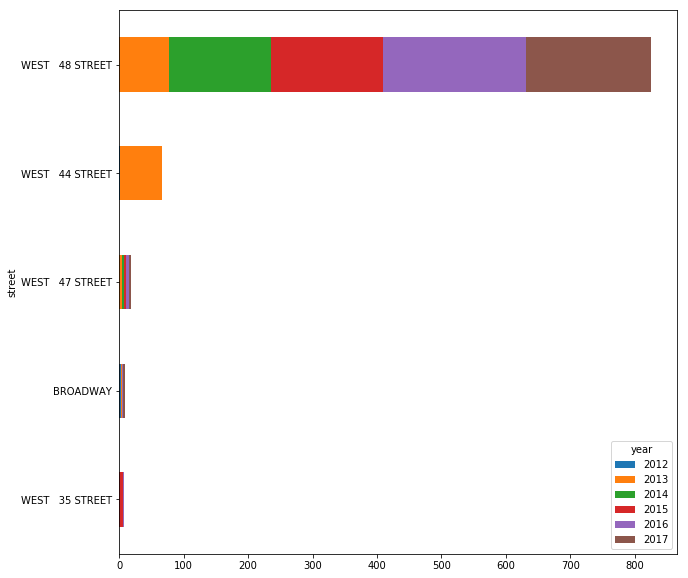

In [207]:
in_the_news.tail().plot(kind='barh',x='street',stacked=True,figsize=(10,10))

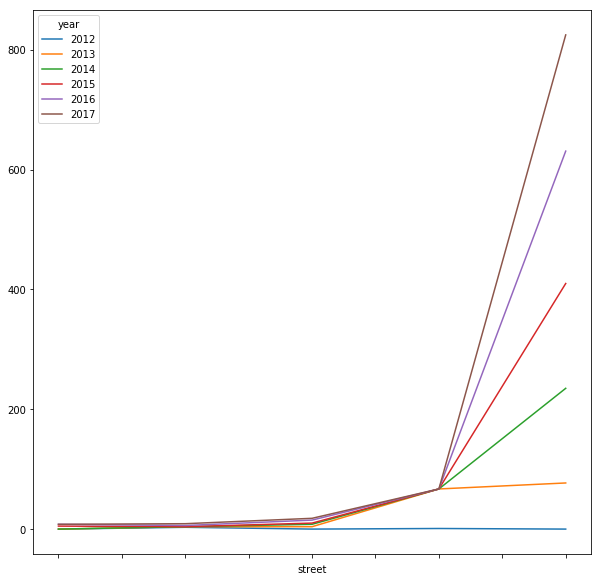

In [208]:
in_the_news.tail().plot(kind='line',x='street',stacked=True,figsize=(10,10))

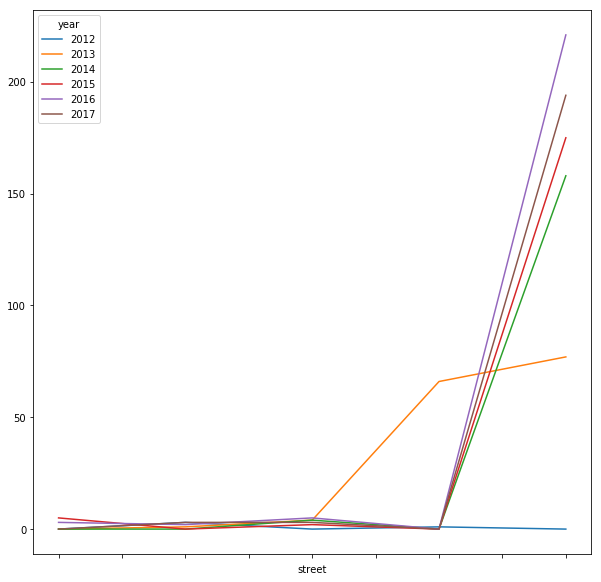

In [210]:
in_the_news.tail().plot(kind='line',x='street',figsize=(10,10))

In [ ]:
#########################

In [228]:
in_the_news2 = news.groupby('year').street.value_counts().unstack().reset_index().fillna(0)
in_the_news2.head()

street,year,1271 Avenue of the Americas,37 STREET,44 DRIVE,47 ROAD,48 STREET,5 AVENUE,"5 AVENUE between EAST 70 STREET and EAST 71 STREET, GRAND ARMY PLAZA",6 AVENUE,7 AVE,...,WEST 58 STREET,WEST 59 STREET,WEST 65 STREET,WEST 66 STREET,WEST 67 STREET,WEST 126 STREET,WEST 126 STREET,WEST 17TH ST,WEST END AVENUE,WILLIAM STREET
0,2012,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2013,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,2.0,2.0,1.0,0.0,0.0
2,2014,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2015,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,...,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2016,0.0,0.0,1.0,0.0,3.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [213]:
in_the_news2['total'] = in_the_news.sum(axis=1)
#in_the_news.sort_values(by='total',ascending=True)
in_the_news.head()

year,street,2012,2013,2014,2015,2016,2017,total
0,1271 Avenue of t...,0.0,0.0,1.0,0.0,0.0,0.0,1.0
59,ST NICHOLAS TERRACE,0.0,0.0,0.0,0.0,0.0,1.0,1.0
33,EAST 52 STREET,0.0,0.0,1.0,0.0,0.0,0.0,1.0
48,MULBERRY STREET,1.0,0.0,0.0,0.0,0.0,0.0,1.0
10,78 CRESCENT,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [214]:
in_the_news2.sort_values(by='total',inplace=True)
in_the_news2.tail()

street,year,1271 Avenue of the Americas,37 STREET,44 DRIVE,47 ROAD,48 STREET,5 AVENUE,"5 AVENUE between EAST 70 STREET and EAST 71 STREET, GRAND ARMY PLAZA",6 AVENUE,7 AVE,...,WEST 59 STREET,WEST 65 STREET,WEST 66 STREET,WEST 67 STREET,WEST 126 STREET,WEST 126 STREET,WEST 17TH ST,WEST END AVENUE,WILLIAM STREET,total
1,2013,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,2.0,2.0,1.0,0.0,0.0,2.0
2,2014,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,2015,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
5,2017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
4,2016,0.0,0.0,1.0,0.0,3.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6.0


In [215]:
in_the_news2.drop(columns='total',inplace=True)
in_the_news2.tail()

street,year,1271 Avenue of the Americas,37 STREET,44 DRIVE,47 ROAD,48 STREET,5 AVENUE,"5 AVENUE between EAST 70 STREET and EAST 71 STREET, GRAND ARMY PLAZA",6 AVENUE,7 AVE,...,WEST 58 STREET,WEST 59 STREET,WEST 65 STREET,WEST 66 STREET,WEST 67 STREET,WEST 126 STREET,WEST 126 STREET,WEST 17TH ST,WEST END AVENUE,WILLIAM STREET
1,2013,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,2.0,2.0,1.0,0.0,0.0
2,2014,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2015,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,...,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2016,0.0,0.0,1.0,0.0,3.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [219]:
#in_the_news2.tail().plot(kind='line',y='year',stacked=True,figsize=(10,10))